In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
z = np.arange(-10,0,1)
v = z**2
zt = np.arange(-11,0,1)+.5

In [3]:
def interp2z_3d(z0, z, v, b_extrap=2, t_extrap=2):
    """
    b_extrap, t_extrap:
        0 set to NaN
        1 set to nearest neighboor
        2 linear extrapolation
    """
    import crocosi.fast_interp3D as fi  # OpenMP accelerated C based interpolator
    # check v and z have identical shape
    assert v.ndim==z.ndim
    # add dimensions if necessary
    if v.ndim == 1:
        lv = v.squeeze()[:,None,None]
        lz = z.squeeze()[:,None,None]
    elif v.ndim == 2:
        lv = v[...,None]
        lz = z[...,None]
    else:
        lz = z[...]
        lv = v[...]
    #
    return fi.interp(z0.astype('float64'), lz.astype('float64'), lv.astype('float64'), b_extrap, t_extrap)

(11, 1, 1)


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/utils.py:137: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


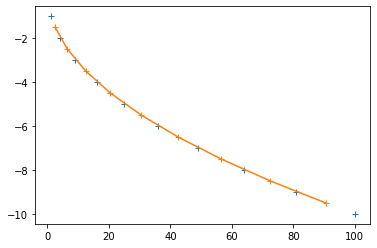

In [4]:
# no extrapolation
vt = interp2z_3d(zt, z, v, 0, 0)
print(vt.shape)
ax = plt.subplot(111)
ax.plot(v, z, '+')
ax.plot(vt.squeeze(), zt, '+-')

(11, 1, 1)


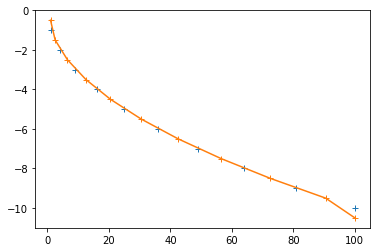

In [5]:
# nearest neighboor extrapolation
vt = interp2z_3d(zt, z, v, 1, 1)
print(vt.shape)
ax = plt.subplot(111)
ax.plot(v, z, '+')
ax.plot(vt.squeeze(), zt, '+-')

(11, 1, 1)


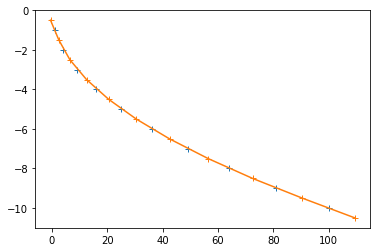

In [6]:
# linear extrapolation
vt = interp2z_3d(zt, z, v, 2, 2)
print(vt.shape)
ax = plt.subplot(111)
ax.plot(v, z, '+')
ax.plot(vt.squeeze(), zt, '+-')